In [2]:
%load_ext autoreload
%autoreload 2
from LHCB_Velo_Toy_Models.state_event_generator import *
from LHCB_Velo_Toy_Models import state_event_model 

import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
dz = 20 #mm

n_particles=[2]
events = len(n_particles)
layers = 3

n = np.sum(n_particles)

module_id = [l for l in range(1, layers+1)]
lx = [33 for x in range(1, layers+1)]
ly = [33 for x in range(1, layers+1)]
zs = [dz*l for l in range(1, layers+1)]


Detector = state_event_model.PlaneGeometry(module_id=[1,2,3],lx = [10,10,10],ly = [10,10,10],z = [10,20,30])
# Detector = state_event_model.RectangularVoidGeometry(module_id=module_id,lx = lx,ly = ly,z=zs, void_x_boundary=5, void_y_boundary=5)

state_event_gen = StateEventGenerator(Detector, events = len(n_particles), n_particles=n_particles, measurement_error=0.0)
state_event_gen.generate_random_primary_vertices(events, {'x': 0, 'y': 0, 'z': 0})



[(0, 0, 0.0)]

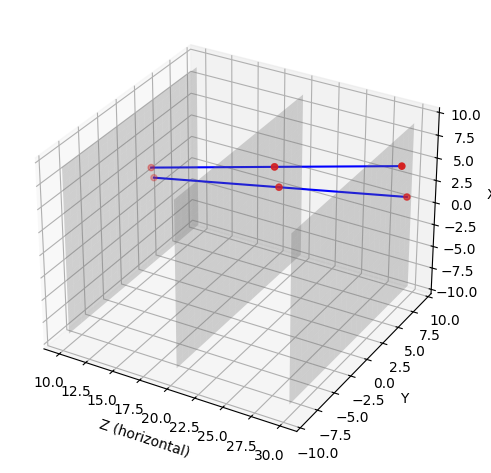

In [17]:
event_particles = []
for event in range(events):
    particles_list = []
    for particle in range(n):
        particle_dict = {
            'type' : 'MIP',
            'mass': 0.511,
            'q': 1
        }
        particles_list.append(particle_dict)
    event_particles.append(particles_list)

state_event_gen.generate_particles(event_particles)

event_tracks = state_event_gen.generate_complete_events()

event_tracks.plot_segments()

In [34]:
from LHCB_Velo_Toy_Models.simple_hamiltonian import SimpleHamiltonian


ham = SimpleHamiltonian(
        epsilon=1e-3,
        gamma=2.0,
        delta=1.0
    )

ham.construct_hamiltonian(event=event_tracks)
classical_solution = ham.solve_classicaly()
T = .45
discretized_classical_solution = (classical_solution > T).astype(int)
classical_solution

2
[Hit(hit_id=1, x=np.float64(0.995071789095471), y=np.float64(5.6195208413913456), z=20, module_id=2, track_id=0), Hit(hit_id=4, x=np.float64(3.725298821643156), y=np.float64(4.916533720694351), z=20, module_id=2, track_id=1)] 

2
[Hit(hit_id=2, x=np.float64(1.4932495541310287), y=np.float64(8.428162092683099), z=30, module_id=3, track_id=0), Hit(hit_id=5, x=np.float64(5.5872258178676875), y=np.float64(7.375102365543125), z=30, module_id=3, track_id=1)] 

Segment(segment_id=0, hits=[Hit(hit_id=0, x=np.float64(0.4972178848923495), y=np.float64(2.8093679863838705), z=10, module_id=1, track_id=0), Hit(hit_id=1, x=np.float64(0.995071789095471), y=np.float64(5.6195208413913456), z=20, module_id=2, track_id=0)])
Hit(hit_id=0, x=np.float64(0.4972178848923495), y=np.float64(2.8093679863838705), z=10, module_id=1, track_id=0)
Hit(hit_id=1, x=np.float64(0.995071789095471), y=np.float64(5.6195208413913456), z=20, module_id=2, track_id=0)
False


Segment(segment_id=0, hits=[Hit(hit_id=0, x=np.flo

array([0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333])

In [ ]:
event_tracks.hits

[Hit(hit_id=0, x=np.float64(-1.7346437593610602), y=np.float64(-15.243788079740403), z=20, module_id=1, track_id=0),
 Hit(hit_id=1, x=np.float64(-2.1588342411285684), y=np.float64(-18.982163376330227), z=40, module_id=2, track_id=0),
 Hit(hit_id=2, x=np.float64(-2.58260223494279), y=np.float64(-22.720798089668232), z=60, module_id=3, track_id=0),
 Hit(hit_id=3, x=np.float64(5.841521206650796), y=np.float64(3.436759128153962), z=20, module_id=1, track_id=1),
 Hit(hit_id=4, x=np.float64(9.028954407743143), y=np.float64(5.314423094223906), z=40, module_id=2, track_id=1),
 Hit(hit_id=5, x=np.float64(12.213509550759598), y=np.float64(7.193759226382218), z=60, module_id=3, track_id=1),
 Hit(hit_id=6, x=np.float64(7.767628859017324), y=np.float64(-5.266414141872973), z=20, module_id=1, track_id=2),
 Hit(hit_id=7, x=np.float64(12.006000220477002), y=np.float64(-8.140810506029082), z=40, module_id=2, track_id=2),
 Hit(hit_id=8, x=np.float64(16.245901280829973), y=np.float64(-11.014798881896233)

In [ ]:
print(event_tracks.hits)
print(event_tracks.segments)
print(event_tracks.tracks)
print(event_tracks.modules)

[Hit(hit_id=0, x=np.float64(-1.7346437593610602), y=np.float64(-15.243788079740403), z=20, module_id=1, track_id=0), Hit(hit_id=1, x=np.float64(-2.1588342411285684), y=np.float64(-18.982163376330227), z=40, module_id=2, track_id=0), Hit(hit_id=2, x=np.float64(-2.58260223494279), y=np.float64(-22.720798089668232), z=60, module_id=3, track_id=0), Hit(hit_id=3, x=np.float64(5.841521206650796), y=np.float64(3.436759128153962), z=20, module_id=1, track_id=1), Hit(hit_id=4, x=np.float64(9.028954407743143), y=np.float64(5.314423094223906), z=40, module_id=2, track_id=1), Hit(hit_id=5, x=np.float64(12.213509550759598), y=np.float64(7.193759226382218), z=60, module_id=3, track_id=1), Hit(hit_id=6, x=np.float64(7.767628859017324), y=np.float64(-5.266414141872973), z=20, module_id=1, track_id=2), Hit(hit_id=7, x=np.float64(12.006000220477002), y=np.float64(-8.140810506029082), z=40, module_id=2, track_id=2), Hit(hit_id=8, x=np.float64(16.245901280829973), y=np.float64(-11.014798881896233), z=60, 

In [ ]:
[h in event_tracks.hits for h in range(1, layers+1) ]

[False, False, False]